In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def draw_plot():
    # Use Pandas to import the data from epa-sea-level.csv.
    # Assuming the file is named 'epa-sea-level.csv' and is accessible.
    df = pd.read_csv('flat-ui__data-Mon Jul 21 2025.csv')

    # Use matplotlib to create a scatter plot using the Year column as the x-axis
    # and the CSIRO Adjusted Sea Level column as the y-axis.
    plt.figure(figsize=(10, 6)) # Set figure size for better readability
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Original Data')

    # Use the linregress function from scipy.stats to get the slope and y-intercept
    # of the line of best fit. Plot the line of best fit over the top of the scatter plot.
    # Make the line go through the year 2050 to predict the sea level rise in 2050.
    
    # Linear regression for the entire dataset
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    
    # Create a range of years for prediction up to 2050
    # Start from the earliest year in the dataset to 2050
    years_for_line1 = np.arange(df['Year'].min(), 2051)
    sea_level_predicted1 = intercept1 + slope1 * years_for_line1
    plt.plot(years_for_line1, sea_level_predicted1, color='red', label=f'Line of Best Fit (All Data) - Predicted 2050: {intercept1 + slope1 * 2050:.2f} inches')

    # Plot a new line of best fit just using the data from year 2000
    # through the most recent year in the dataset.
    # Make the line also go through the year 2050 to predict the sea level rise in 2050
    # if the rate of rise continues as it has since the year 2000.
    
    # Filter data from year 2000 onwards
    df_2000 = df[df['Year'] >= 2000]
    
    # Linear regression for data from 2000 onwards
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])
    
    # Create a range of years for prediction from 2000 to 2050
    years_for_line2 = np.arange(2000, 2051)
    sea_level_predicted2 = intercept2 + slope2 * years_for_line2
    plt.plot(years_for_line2, sea_level_predicted2, color='green', label=f'Line of Best Fit (2000 Onwards) - Predicted 2050: {intercept2 + slope2 * 2050:.2f} inches')

    # The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend() # Show the labels for the lines
    plt.grid(True) # Add a grid for better readability

    # Save plot and return figure (as per common project requirements)
    plt.savefig('sea_level_plot.png')
    return plt.gca().figure # Return the current figure object


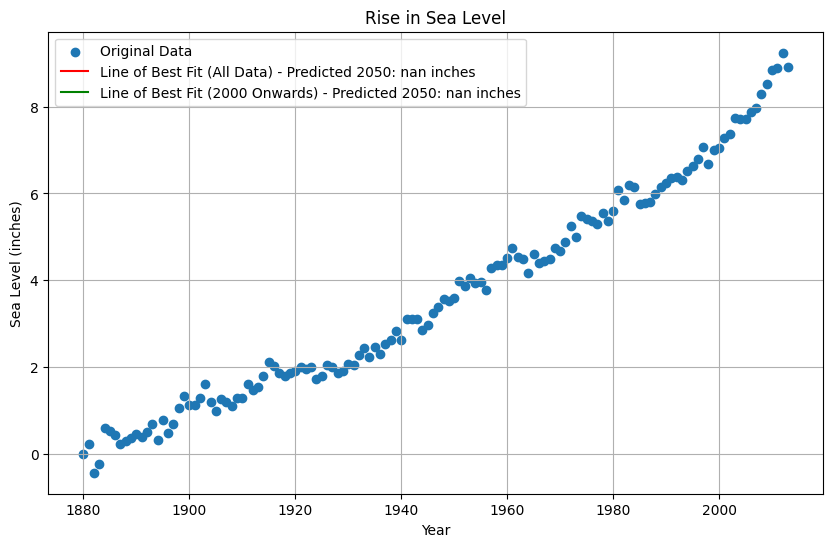

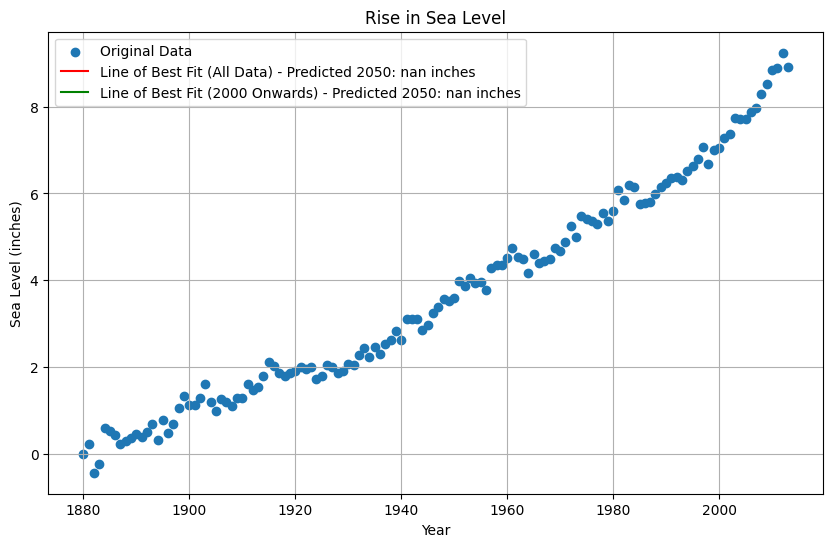

In [11]:
draw_plot()